In [1]:
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: c:\users\91732\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
df= pd.read_csv('GlobalTemperatures.csv')
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [5]:
df.drop(['LandMaxTemperature','LandMaxTemperatureUncertainty','LandMinTemperature','LandMinTemperatureUncertainty','LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'],axis=1,inplace=True)


In [6]:
df['dt']=pd.to_datetime(df['dt'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dt                                 3192 non-null   datetime64[ns]
 1   LandAverageTemperature             3180 non-null   float64       
 2   LandAverageTemperatureUncertainty  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 74.9 KB


In [8]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072


In [9]:
df.set_index('dt',inplace=True)

In [10]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty
dt,,
1750-01-01,3.034,3.574
1750-02-01,3.083,3.702
1750-03-01,5.626,3.076
1750-04-01,8.490,2.451
1750-05-01,11.573,2.072


In [11]:
df.isnull().sum()

LandAverageTemperature               12
LandAverageTemperatureUncertainty    12
dtype: int64

In [12]:
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(df['LandAverageTemperature'].mean())

In [13]:
df['LandAverageTemperatureUncertainty'] = df['LandAverageTemperatureUncertainty'].fillna(df['LandAverageTemperatureUncertainty'].mean())

In [14]:
df.isnull().sum()

LandAverageTemperature               0
LandAverageTemperatureUncertainty    0
dtype: int64

<AxesSubplot: xlabel='dt'>

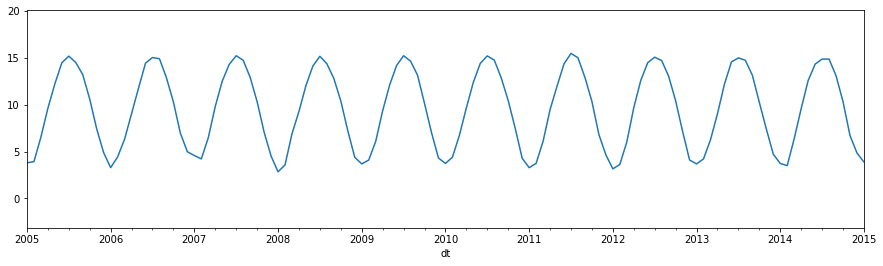

In [15]:
df['LandAverageTemperature'].plot(xlim=['2005-01-01','2015-01-01'],figsize=(15,4))

### Checking whether the dataset is a stationary or not

In [16]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['LandAverageTemperature'])

ADF Statistics: -4.036039785872676
p- value: 0.0012331195770598107
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**As it is a seasonal data, will do 12 times differencing i.e. shift(12)**


In [18]:
df['LandAverageTemperature_12difference']= df['LandAverageTemperature']-df['LandAverageTemperature'].shift(12)

In [19]:
adf_test((df['LandAverageTemperature_12difference']).dropna())

ADF Statistics: -16.245241151994403
p- value: 3.692614581683388e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


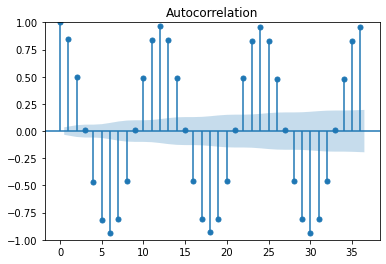

In [20]:
acf = plot_acf(df['LandAverageTemperature']) # ACF used for moving average

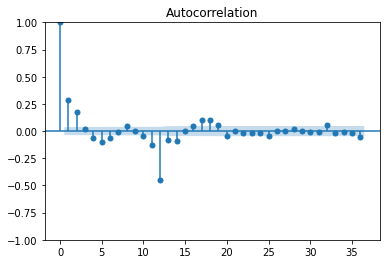

In [21]:
acf2 = plot_acf(df['LandAverageTemperature_12difference'].dropna())

c:\users\91732\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


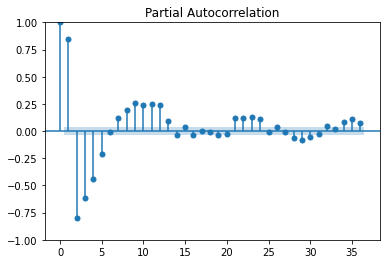

In [22]:
pacf = plot_pacf(df['LandAverageTemperature'].dropna()) #PACF used for auto regression

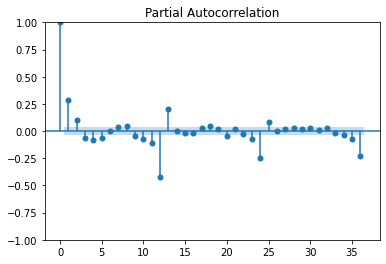

In [23]:
pacf2 = plot_pacf(df['LandAverageTemperature_12difference'].dropna())

In [24]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperature_12difference
dt,,,
1750-01-01,3.034,3.574,NaN
1750-02-01,3.083,3.702,NaN
1750-03-01,5.626,3.076,NaN
1750-04-01,8.490,2.451,NaN
1750-05-01,11.573,2.072,NaN
...,...,...,...
2015-08-01,14.755,0.072,-0.120
2015-09-01,12.999,0.079,-0.092
2015-10-01,10.801,0.102,0.471


In [25]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2005,12,1)
test_dataset_end=datetime(2015,12,1)

In [26]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [27]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [28]:
test_data

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperature_12difference
dt,,,
2006-01-01,3.286,0.064,-0.522
2006-02-01,4.430,0.118,0.510
2006-03-01,6.329,0.077,-0.215
2006-04-01,9.055,0.089,-0.563
2006-05-01,11.786,0.092,-0.440
...,...,...,...
2015-08-01,14.755,0.072,-0.120
2015-09-01,12.999,0.079,-0.092
2015-10-01,10.801,0.102,0.471


In [50]:
# Creating ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [51]:
train_data

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandAverageTemperature_12difference
dt,,,
1750-01-01,3.034,3.574,NaN
1750-02-01,3.083,3.702,NaN
1750-03-01,5.626,3.076,NaN
1750-04-01,8.490,2.451,NaN
1750-05-01,11.573,2.072,NaN
...,...,...,...
2005-08-01,14.510,0.078,0.322
2005-09-01,13.217,0.080,0.575
2005-10-01,10.601,0.064,0.474


In [56]:
my_model= ARIMA(train_data['LandAverageTemperature'],order=(12,1,0))

c:\users\91732\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\91732\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\91732\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
arima_model=my_model.fit()

In [58]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                 3072
Model:                    ARIMA(12, 1, 0)   Log Likelihood               -3876.922
Date:                    Sun, 04 Dec 2022   AIC                           7779.844
Time:                            13:52:41   BIC                           7858.231
Sample:                        01-01-1750   HQIC                          7808.006
                             - 12-01-2005                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5895      0.010    -61.680      0.000      -0.608      -0.571
ar.L2         -0.4462      0.010    -43.127      0.000      -0.467      -0.426
ar.L3         -0.4495      0.012    -37.434      0.000      -0.473      -0.426
ar.L4         -0.5547      0.011    -48.333      0.000      -0.577      -0.532
ar.L5         -0.6316      0.011    -59.821      0.000      -0.652      -0.611
ar.L6         -0.6497      0.011    -57.599      0.000      -0.672      -0.628
ar.L7         -0.6392      0.011    -57.569      0.000      -0.661      -0.617
ar.L8         -0.6117      0.011    -53.977      0.000      -0.634      -0.589
ar.L9         -0.5275      0.011    -47.361      0.000      -0.549      -0.506
ar.L10        -0.4387      0.010    -43.039      0.000      -0.459      -0.419
ar.L11        -0.3215      0.011    -28.630      0.000      -0.344      -0.300
ar.L12        -0.1089      0.010    -10.928      0.000      -0.128      -0.089
sigma2         0.7290      0.009     80.696      0.000       0.711       0.747
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              8050.58
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date= test_data.index[0]
pred_end_date= test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2006-01-01 00:00:00
2015-12-01 00:00:00


In [63]:
pred= arima_model.predict(start=pred_start_date, end= pred_end_date)
residuals= test_data['LandAverageTemperature']-pred

In [64]:
pred

2006-01-01     3.861764
2006-02-01     4.321603
2006-03-01     6.295870
2006-04-01     9.207585
2006-05-01    12.140412
                ...    
2015-08-01    14.456836
2015-09-01    12.765605
2015-10-01    10.254487
2015-11-01     7.596991
2015-12-01     5.504577
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

In [65]:
residuals

dt
2006-01-01   -0.575764
2006-02-01    0.108397
2006-03-01    0.033130
2006-04-01   -0.152585
2006-05-01   -0.354412
                ...   
2015-08-01    0.298164
2015-09-01    0.233395
2015-10-01    0.546513
2015-11-01   -0.163991
2015-12-01    0.013423
Length: 120, dtype: float64

<AxesSubplot: ylabel='Density'>

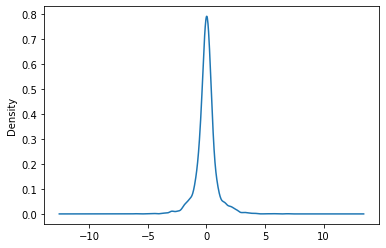

In [68]:
arima_model.resid.plot(kind='kde')

In [69]:
test_data['Predicted_ARIMA']=pred

C:\Users\91732\AppData\Local\Temp\ipykernel_812\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: xlabel='dt'>

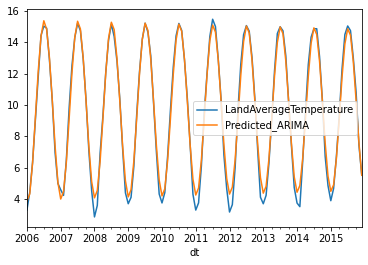

In [70]:
test_data[['LandAverageTemperature','Predicted_ARIMA']].plot()